In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

In [117]:
voter_2016 = pd.read_csv('/Users/xanderhlim/Desktop/2016-voter-survey/VOTER_Survey_December16_Release1.csv', low_memory = False)

voter_2016.head(3)

,case_identifier,weight,PARTY_AGENDAS_rand_2016,pp_primary16_2016,pp_demprim16_2016,pp_repprim16_2016,inputstate_2016,izip_2016,votereg2_2016,votereg_f_2016,...,post_HouseCand3Name_2012,post_HouseCand3Party_2012,post_SenCand1Name_2012,post_SenCand1Party_2012,post_SenCand2Name_2012,post_SenCand2Party_2012,post_SenCand3Name_2012,post_SenCand3Party_2012,starttime_2016,endtime_2016
0,779,0.358213,Republican Party,In the Democratic primary,Hillary Clinton,NaN,California,94952,Yes,Yes,...,NaN,NaN,Shelley Berkley,Democratic,Dean Heller,Republican,NaN,NaN,29nov2016 22:59:43,29nov2016 23:28:24
1,2108,0.562867,Republican Party,In the Republican primary,NaN,Donald Trump,Arizona,85298,Yes,Yes,...,NaN,NaN,Richard Carmona,Democratic,Jeff Flake,Republican,NaN,NaN,29nov2016 15:41:28,29nov2016 18:58:28
2,2597,0.552138,Republican Party,In the Democratic primary,Hillary Clinton,NaN,Wisconsin,54904,Yes,Yes,...,NaN,NaN,Tammy Baldwin,Democratic,Tommy Thompson,Republican,NaN,NaN,29nov2016 16:08:39,29nov2016 16:32:43


In [118]:
# see what candidate survey taker prefers 
candidates_favor = voter_2016.columns.values[29:37]

rating_scale = np.array(["Very favorable", "Somewhat favorable",
             "Somewhat unfavorable", "Very unfavorable",
             "Don't know", ""])

# create dictionary to map numeric values to survey taker reactions 
rating_dict = {"Very favorable": 2, "Somewhat favorable": 1,
             "Somewhat unfavorable": -1, "Very unfavorable": -2,
             "Don't know": 0, "": 0}

# target is who the survey taker voter for
actualVote = voter_2016.columns.values[14]

target_dict = {"Hillary Clinton":1, "Donald Trump":2, 
               "Gary Johnson": 3, "Jill Stein": 4, 
               "Evan McMullin": 5, "Other": 6, 
               "Did not vote for President": 7, 
               ".": 0 }

In [119]:
favorable_opinion_matrix = voter_2016.loc[:,candidates_favor]
target = voter_2016.loc[:,actualVote]
for col in range(len(candidates_favor)):
    # convert text to numeric values
    favorable_opinion_matrix[candidates_favor[col]] = favorable_opinion_matrix[candidates_favor[col]].map(rating_dict)
    # replacing all nans with 0
    favorable_opinion_matrix[candidates_favor[col]].fillna(0, inplace = True) 

# fill nans for columns 
target.fillna(0,inplace= True)

In [120]:
# concatentate targets to original data frame 
new_df = pd.concat([favorable_opinion_matrix, target], axis=1)
# map numerical values to candidates for visualization purposes
new_df['presvote16post_2016'] = new_df['presvote16post_2016'].map(target_dict)


In [121]:
# checking if all nans are gone
print(favorable_opinion_matrix.isnull().values.any())
print(target.isnull().values.any())

False
False


In [122]:
# perform PCA
q = 4
pca = PCA(n_components = q)
Z = pca.fit_transform(favorable_opinion_matrix)
var_ratio = pca.explained_variance_ratio_

principalDf = pd.DataFrame(data = Z
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4'])

In [123]:
pca.components_

array([[ 0.42928519,  0.32891668,  0.27049132,  0.15370247, -0.46200778,
        -0.41350862, -0.36246199,  0.30808893],
       [-0.17763207,  0.22384456,  0.48470078,  0.58534096,  0.27165757,
         0.28000293,  0.24293107,  0.35995359],
       [-0.09971252, -0.53870264,  0.04219436,  0.48449483, -0.21722557,
        -0.51887992,  0.32168304, -0.2084178 ],
       [-0.41186077, -0.19385899, -0.08531805,  0.3470401 , -0.0330232 ,
         0.15589904, -0.79445237, -0.09232433]])

In [124]:
# original dataframe
favorable_opinion_matrix.head(3)

,fav_trump_2016,fav_cruz_2016,fav_ryan_2016,fav_romn_2016,fav_obama_2016,fav_hrc_2016,fav_sanders_2016,fav_rubio_2016
0,-2.0,-2.0,-1.0,-1.0,2.0,2.0,2.0,-1.0
1,2.0,2.0,2.0,2.0,-2.0,-2.0,-2.0,2.0
2,-2.0,-2.0,-2.0,-2.0,2.0,2.0,1.0,-2.0


In [125]:
# adding targets to new data frame 
new_principalDf = pd.concat([principalDf,target], axis=1)
# visualize our principal component Data frame 
new_principalDf.head(3)

,principal component 1,principal component 2,principal component 3,principal component 4,presvote16post_2016
0,-4.328888,0.762804,-0.276063,-0.267661,Hillary Clinton
1,5.852681,2.059273,-0.217220,0.503959,Donald Trump
2,-4.698709,-0.910123,-0.916017,0.357394,Hillary Clinton


In [126]:
print ('Original Shape: ', favorable_opinion_matrix.shape)
print ('Reduced Shape: ', Z.shape)

Original Shape:  (8000, 8)
Reduced Shape:  (8000, 4)


In [127]:
print ('Ratio of variance explained: ', var_ratio)
# reduced features down to 4 components to get 88% ratio of variance explained
print(pca.explained_variance_ratio_.cumsum())

Ratio of variance explained:  [0.65525026 0.12418475 0.05230979 0.04654282]
[0.65525026 0.77943501 0.8317448  0.87828762]


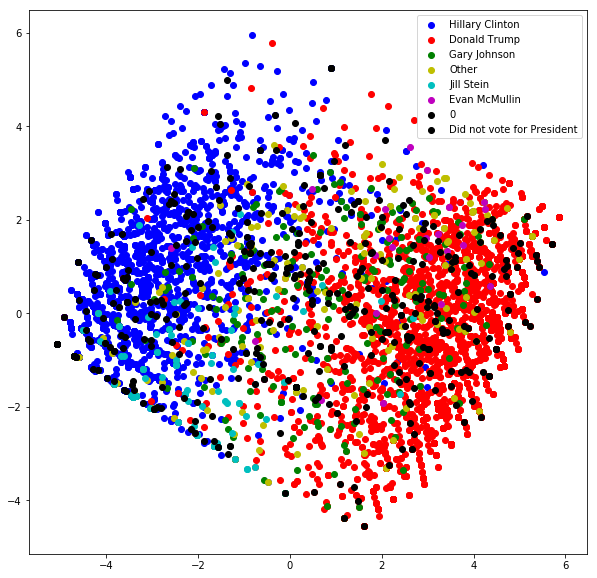

In [159]:
# each reaction to candidate corresponds to an index
candidates = new_principalDf['presvote16post_2016']

colormap = ['b','r','g','y','c','m','k', 'k']
# visual new axes
plt.figure(figsize=(10, 10))
for i, c in enumerate(candidates.unique()):
    Z_target = Z[new_principalDf['presvote16post_2016'] == c]
    plt.scatter(Z_target[:, 0], Z_target[:, 1], c=colormap[i])
    
plt.legend(candidates.unique())


In [66]:
# eigenvalues are given by the components of PCA
pca.components_

array([[ 0.42928519,  0.32891668,  0.27049132,  0.15370247, -0.46200778,
        -0.41350862, -0.36246199,  0.30808893],
       [-0.17763207,  0.22384456,  0.48470078,  0.58534096,  0.27165757,
         0.28000293,  0.24293107,  0.35995359],
       [-0.09971252, -0.53870264,  0.04219436,  0.48449483, -0.21722557,
        -0.51887992,  0.32168304, -0.2084178 ],
       [-0.41186077, -0.19385899, -0.08531805,  0.3470401 , -0.0330232 ,
         0.15589904, -0.79445237, -0.09232433]])